<a href="https://colab.research.google.com/github/cs975/protein_sectors/blob/main/manuscript_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

Upload model_functions.py to this colab notebook.

In [ ]:
# import model functions
from model_functions import *

# Load gene data

Upload the following files to this colab notebook:
- mtx_ref
- aln
- pdb
- cf

We have provided example files for the 3AK8 protein family.

In [ ]:
gene_name = '3AK8A'

# Contact map

Visualize the protein contact map, as determined by ConFind. 

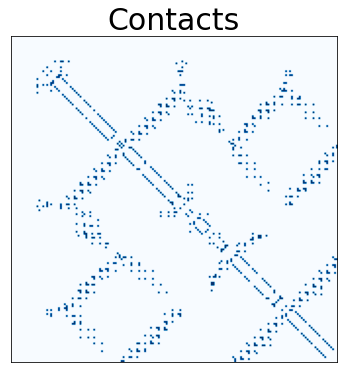

In [ ]:
confind_mtx = get_confind(gene_name)

plt.figure(figsize = (6,6))
plt.imshow(confind_mtx, cmap='Blues')
plt.title('Contacts', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.show()

# Coevolution matrix

Visualize the sequence coevolution matrix (raw and average product corrected) that is estimated by GREMLIN.

In [ ]:
seqs = parse_aln(get_path(gene_name, 'aln'))
msa = mk_msa(seqs)
msa_weights = get_eff(msa)

V,W = GREMLIN_simple(msa, msa_weights, opt_iter = 100)
raw, apc = get_mtx(W)

0 442620.38
50 191287.0
100 190336.19


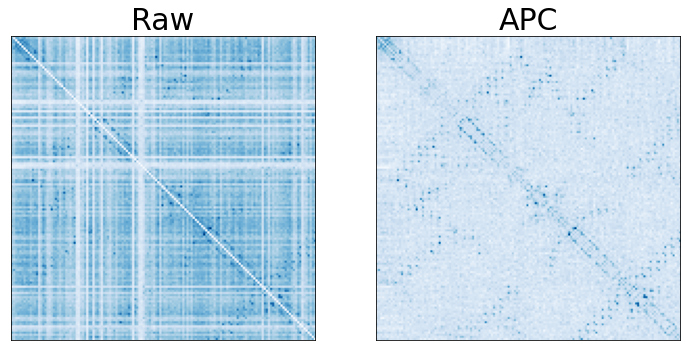

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.imshow(raw, cmap='Blues')
plt.title('Raw', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(1,2,2)
plt.imshow(apc, cmap='Blues')
plt.title('APC', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.show()

# Extract sectors

Protein sector extraction model. 
- opt_iter_init = number of iterations for initializing the weights and bias parameter to estimate the coevolution matrix via GREMLIN
- opt_iter = number of iterations for each bootstrap run to estimate the coevolution matrix
- R_thres = minimum correlation value (between sectors from individual bootstrap runs) necessary before model is completed

In [ ]:
import warnings
warnings.filterwarnings("ignore")

APC, BINARY_MTX = run_spectral_clustering(gene_name, opt_iter_init=1000, opt_iter=100, R_thres=0.99)
resi, scale = get_sectors(gene_name, BINARY_MTX)

Initializing...
0 442620.38
500 189558.39
1000 189559.11
Iter 0 ...
0 307408.94
50 136763.11
100 136297.7
Iter 1 ...
0 307958.75
50 138017.4
100 137561.83
Iter 2 ...
0 306664.12
50 134680.38
100 134218.39
Iter 3 ...
0 307566.3
50 137779.06
100 137319.89
Iter 4 ...
0 307267.75
50 137427.95
100 136972.39
Iter 5 ...
0 306519.94
50 135516.77
100 135047.42
Iter 6 ...
0 308246.7
50 138609.16
100 138148.73
Iter 7 ...
0 307438.84
50 137826.92
100 137372.66
Iter 8 ...
0 306777.47
50 136317.62
100 135859.47
Iter 9 ...
0 306476.38
50 135088.69
100 134618.27
Iter 10 ...
0 307777.56
50 138565.39
100 138119.72
R 0.917
Iter 11 ...
0 306719.75
50 137607.66
100 137159.38
R 0.935
Iter 12 ...
0 307456.66
50 138343.94
100 137886.22
R 0.946
Iter 13 ...
0 307285.62
50 138122.17
100 137666.88
R 0.962
Iter 14 ...
0 307323.12
50 137233.6
100 136767.73
R 0.972
Iter 15 ...
0 305337.56
50 132451.84
100 131978.4
R 0.97
Iter 16 ...
0 308552.3
50 138578.02
100 138118.11
R 0.979
Iter 17 ...
0 307306.3
50 136587.14
10

# Visualize sectors

In [ ]:
view_sectors(gene_name, resi, scale)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_sectors(gene_name, resi, scale)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Graph networks

Graph networks using pairwise contacts or top coevolution signals as edges. Nodes are residues involved in a given sector. Scaled beta indices are noted above each network.

## Contacts

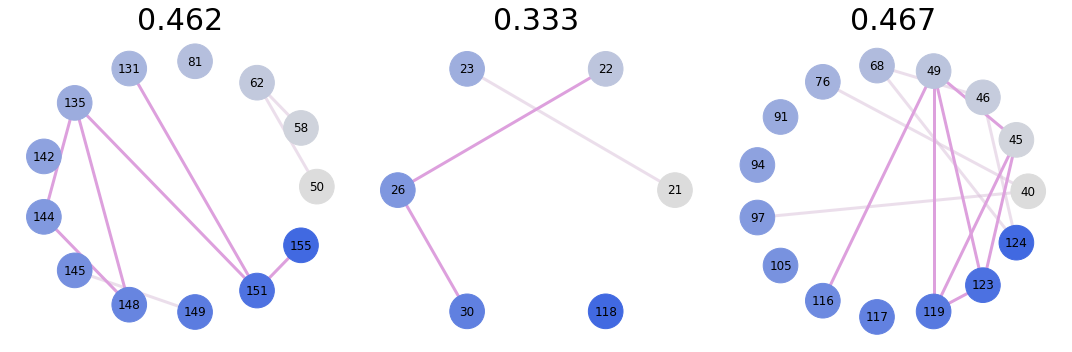

In [ ]:
Graphs_confind, beta_confind = get_graphs_with_confind_edges(resi, confind_mtx)
plot_networks(Graphs_confind, beta_confind)

## Coevolution

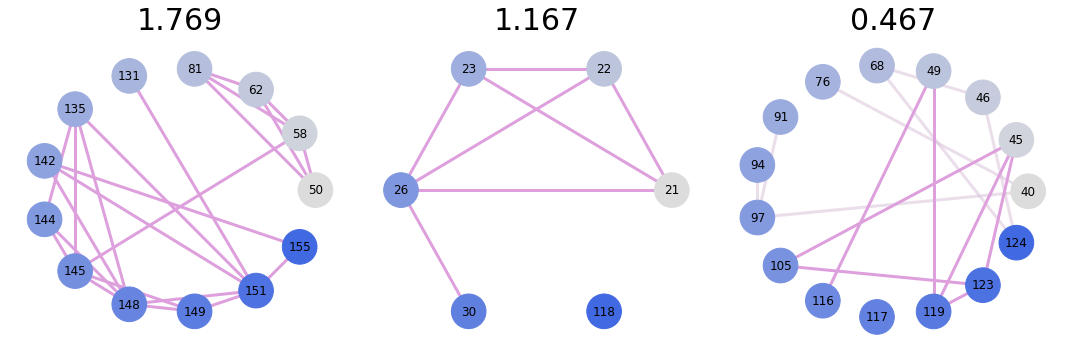

In [ ]:
apc_reinsert = reinsert_gaps_in_apc(gene_name, confind_mtx, apc)
Graphs_coev, beta_coev = get_graphs_with_coev_edges(resi, confind_mtx, apc_reinsert)
plot_networks(Graphs_coev, beta_coev)